In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

(512, 512)


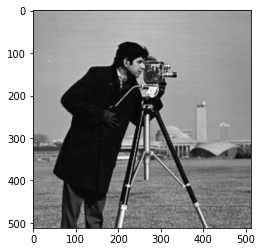

In [2]:
p=input("enter path of cover image")
cover=cv2.imread('images/'+p,0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


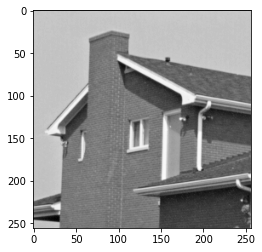

In [3]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

In [6]:
cover1d=cover.flatten()
msg1d=msg.flatten()
print(cover1d)
print(msg1d)

[159 159 159 ... 112 110 119]
[ 72  72  73 ...  89  90 166]


In [7]:
msg_bin=''
for i in msg1d:
    msg_bin+=format(int(i),'08b')
print(msg_bin)

1111011011110001000000010000010011111110111111110000000011111010111101101111000011111001000000001110111011101010111011001111000011101110111011001110100011101110111100101111001011110101000001001111111011110000111100001111000011111100111011001110110011101101000000001110101011011110110111001101101011011000111000010000010011100110111001101111010011111100111001101101111011100000111011001110000011011010110111001110001011100110111010001110101011110010111111010000010100000000111101101110011011110010111110110000110100001011000011110000100011111110111011001110111011101100111011001110111011100100111010101110100011110010111000101110100011111010111111001111100011110110111111001111111011111111000000110000000011001000100110101001011010010000100010101001000010001100100001101001000010010100100101101001101010001010100011101000100010001110100010101000000001111110100101001000110010010000100011001000110010001010100011101001100010011100100111001001001010001110100110101001111010010100100111001001100010011100

[[157 156 158 ... 152 154 154]
 [153 156 158 ... 152 150 148]
 [158 159 159 ... 152 148 148]
 ...
 [121 123 129 ... 126 118 105]
 [122 119 126 ... 130 119 105]
 [125 123 125 ... 114 109 118]]


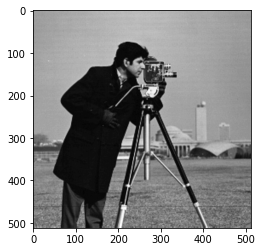

In [8]:
mbt=0
bits=2
for i in range(cover1d.shape[0]):
    bt=format(int(cover1d[i]),'08b')
    ad=msg_bin[mbt:mbt+bits]
    if ad=='':
        break
    bt=bt[:8-bits]+ad
    mbt+=bits
    cover1d[i]=int(bt,2)
cover_stego=cover1d.reshape(cover.shape)
print(cover_stego)
plt.imshow(cover_stego,cmap='gray')
plt.show()

[[ 72  72  73 ...  72  73  72]
 [189 188 188 ... 189 190 189]
 [186 189 187 ... 191 190 189]
 ...
 [187 187 187 ...  71  81 169]
 [187 187 187 ...  79  88 169]
 [186 188 188 ...  89  90 166]]


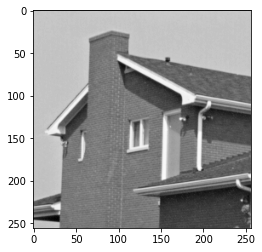

In [9]:
size=math.ceil((msg.shape[0]*msg.shape[1]*8)/bits)
msgl=[]
stego1d=cover_stego.flatten()
msg_bin=''
for i in stego1d:
    size-=1
    msg_bin+=format(int(i),'08b')[8-bits:]
    if len(msg_bin)>=8:
        msgl.append(int(msg_bin[:8],2))
        msg_bin=msg_bin[8:]
    if size==0:
        break
msg_dc=np.array(msgl,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
print(msg_dc)
plt.imshow(msg_dc,cmap='gray')
plt.show()

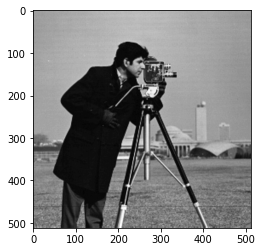

In [16]:
#########                       STEGANOGRAPHY ENCODING (WITHOUT SIZE ENCODING)                 ##########

def stego_encode_LSB(cover,msg,bits):
    if type(msg)==np.ndarray:
        msg_size=msg.shape[0]*msg.shape[1]*8
        msg1d=msg.flatten()
        typ='int'
    elif type(msg)==str:
        msg_size=len(msg)*8
        msg1d=msg
        typ='str'
    if (cover.shape[0]*cover.shape[1])<(msg_size/bits):
        print('message too large')
        return
    cover1d=cover.flatten()
    msg_bin=''
    for i in msg1d:
        if typ=='int':
            msg_bin+=format(int(i),'08b')
        elif typ=='str':
            msg_bin+=format(ord(i),'08b')
    mbt=0
    for i in range(cover1d.shape[0]):
        bt=format(int(cover1d[i]),'08b')
        ad=msg_bin[mbt:mbt+bits]
        if ad=='':
            break
        bt=bt[:8-bits]+ad
        mbt+=bits
        cover1d[i]=int(bt,2)
    cover_stego=cover1d.reshape(cover.shape)
    return cover_stego

cover_stego=stego_encode_LSB(cover,msg,2)
plt.imshow(cover_stego,cmap='gray')
plt.show()

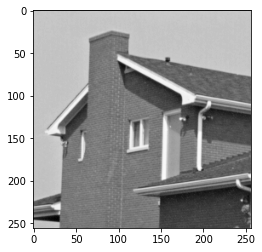

In [18]:
#########                       STEGANOGRAPHY DECODING (WITHOUT SIZE ENCODING)                 ##########

def stego_decode_LSB(stego,size,bits):
    size=math.ceil((size*8)/bits)
    msg=[]
    stego1d=stego.flatten()
    msg_bin=''
    for i in stego1d:
        size-=1
        msg_bin+=format(int(i),'08b')[8-bits:]
        if len(msg_bin)>=8:
            msg.append(int(msg_bin[:8],2))
            msg_bin=msg_bin[8:]
        if size==0:
            break
    return msg

msg_dec=stego_decode_LSB(cover_stego,msg.shape[0]*msg.shape[1],2)
msg_dec=np.array(msg_dec,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
plt.imshow(msg_dec,cmap='gray')
plt.show()

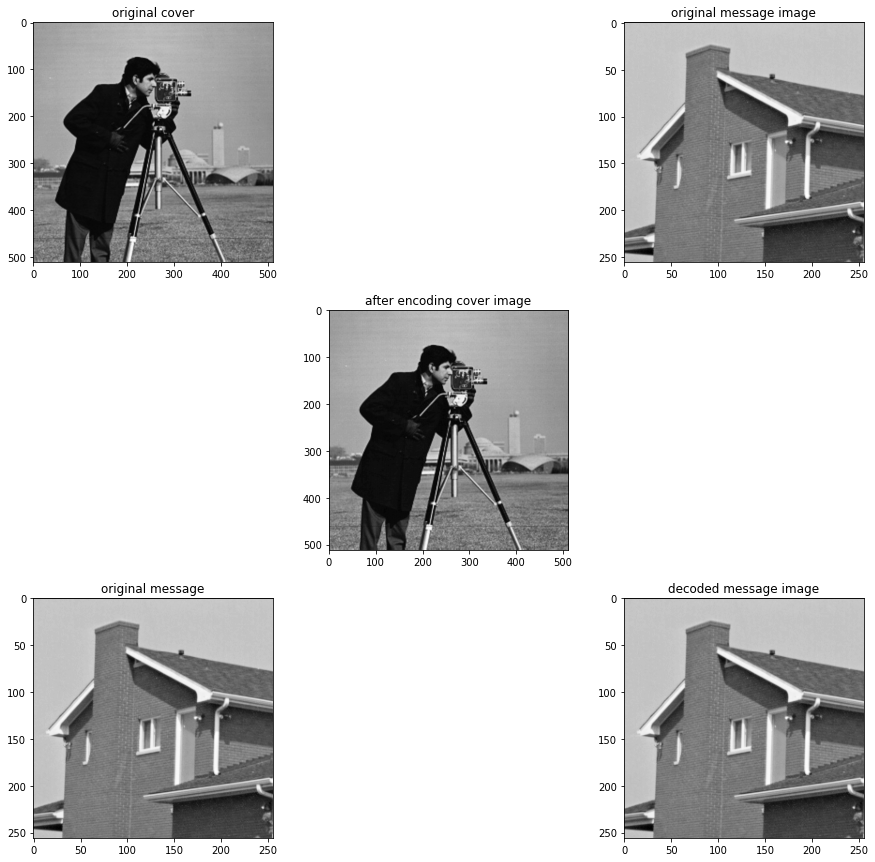

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('original cover')
plt.imshow(cover,cmap='gray')
plt.subplot(3,3,3)
plt.title('original message image')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,5)
plt.title('after encoding cover image')
plt.imshow(cover_stego,cmap='gray')
plt.subplot(3,3,7)
plt.title('original message')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,9)
plt.title('decoded message image')
plt.imshow(msg_dec,cmap='gray')
plt.show()

In [6]:
from dahuffman import HuffmanCodec

In [64]:
hist=[0 for i in range(256)]
for i in range(msg.shape[0]):
    for j in range(msg.shape[1]):
        hist[msg[i,j]]+=1
hist_dict={i : hist[i] for i in range(256)}
hf=HuffmanCodec.from_frequencies(hist_dict)
msg_list=list(msg.flatten())
hf.print_code_table()


Bits Code                                                        Value Symbol
   7 0000000                                                         0 100
  10 0000001000                                                      8 199
  10 0000001001                                                      9 211
   9 000000101                                                       5 43
   8 00000011                                                        3 88
   7 0000010                                                         2 102
   7 0000011                                                         3 76
  10 0000100000                                                     32 174
  10 0000100001                                                     33 198
   9 000010001                                                      17 150
   9 000010010                                                      18 233
  11 00001001100                                                    76 34
  11 00001001101          

In [106]:

encode=hf.encode(msg_list)
print(len(encode))
print(msg_list[0])
a=format(encode[0],'08b')
print(a)
#####encoding

53437
72
00110010


In [110]:
byt_str=''
for i in range(len(encode)):
    byt_str+=format(encode[i],'08b')
print(byt_str)

1101100011011001010111001001100100111000011010110110111101000101001001001100100110101001010110001011001011011000110010001010001100101010010101001111000000001010010110000010100001010001001101010010101100101101100011001111000000001101010110011110111001001100100111000000000011011111110011110111000110111111100100101111011011111110111000110100011011110000001010010000011101111010011001001001101010010000011111101001111011101011001000011001010111000101000010100001101111111000101100111101001111011110110100111101111111010011111100001001111110111010100100000110001101000110111100000111101110101100000110100100110001101001001101010111010100001011110101011001011010000100101010110111110000000011011101010111011001010101010010110100000000100000001001011000000001010010000111000111000101001000010000111110010110101110101111111001010011000010011001101001010010000001010010110111011100101011101100001001100110100101001001011011100110010101110100010110111010110100101000101101001010001101001010111010010111111110

In [114]:
byt_list=[]
for i in range(0,len(byt_str),8):
    byt_list.append(int(byt_str[i:i+8],2))
print(bytes(byt_list))
print(type(hf.decode(bytes(byt_list))))

E\xdcx\xddB\x0b\xa8]\xc1=\xb0E\xdcz=\x04\x82\xc1!&\xe4\x84\x9e\xd3son\x90\xd8\xdbH)A]@\xd8\xc9\xbf\xb7HI\x04\x84\xe95\x16\xc4\x8a\x1e\xf4\xb2\xd8\x06\xa0W\x01*\xc4=!,\xbd\xd5\xee\xbc\x01\xfb\xdcJ\x06\xb6t@t\x00\x07\xe9\xca\xf5\xe5\xe4\x1a\xf4\x1c\x1fq\xa5\xbf\xa0\x18S\xd5q\xda\x94\xbc\xf2D\xe4\xe7z)\xc4y\xfc\xa7\xd6\xfeo\xb7;sE8\xac\x8a\xceb\xea\xf9DW\x15_\xd4\xebo\xb7RD|EQG\x9b}\xb5\x9c\xdf\xfa\x8f\xb9\xa7LH\xc9u\x10\x96m\xbaQ\x8cyN*9\x8b\x9f\xbc\xdb\xce\xdb\xef\xf7]sG>E\x1a+"\xa7g\x9du\xad\xd6\xe5\x15\xad\xda\x94\x8f\xc2\x08\x0f\xeaY,\x8e%\x90JI\xa9[\x05\x84\xabu\x06\xaaJ\xee<\xad\x82BU\xa7x\xf4\xb0\xef\x1e]\xd2`\x91\xe3zL\x13H\xbb\x86\xf6\x92j\r\xf4\x9aE\xdc&\x13\x05\xd4G\xa11\xedB\x82\xbc{Q\xa4\xd4\x12\x1b\xea \xba\x83u\x0fh\xad!"\x93{bOo\xb7\xdb\xa46WW\xb67\xf6\xde\x9b\x19\x1b\x0c\xa0l\xb2\xf4\xdcR\x81;H)\x0fI\r\xf8N\x08q\xcb\x01\x80\xbc\x01\xfati/.Jr\xbc\x14?\x10\xcf\xde\xe2\x03\x93\xaf\xdd^\xedP\xc39\xe3k\xbd\x97\x1f\x1c%\xbe$"\\\xf9g\xdb\xf9\xbf\xdfs\xd5\x91\x1fG\x96s\xbe\xdbI\

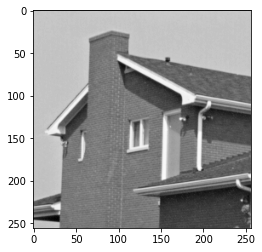

In [117]:
msg_huff_dec=np.array(hf.decode(bytes(byt_list)))
msg_huff_dec=msg_huff_dec.reshape(msg.shape[0],msg.shape[1])
plt.imshow(msg_huff_dec,cmap='gray')